In [114]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import os, shutil, random
#from tensorflow.keras import models, layers
#from tensorflow.keras import optimizers

## Explore Metadata

In [2]:
meta = pd.read_csv('data/HAM10000_metadata.csv')

In [3]:
meta['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

#### There is a class imbalance concerning diagnoses. We have to deal with that later on.

In [4]:
meta.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [138]:
meta.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
duplicate        0
dtype: int64

### Identify lesion_IDs with multiple images for the validation set
To ensure that we don't have the same images in the train and validation set

In [5]:
uni = meta.groupby('lesion_id').count()

In [6]:
uni = uni[uni['image_id'] == 1]

In [7]:
unique_list = list(uni.index)

In [8]:
# define function to identify if a lesion id has duplicate images
def is_duplicate(x):
    
    unique_list = list(uni.index)
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'

In [9]:
meta['duplicate'] = meta['lesion_id']

In [10]:
meta['duplicate'] = meta['duplicate'].apply(is_duplicate)

In [11]:
no_dupl = meta[meta.duplicate == "no_duplicates"]

In [12]:
meta['duplicate'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicate, dtype: int64

### Create a validation set with only non-duplicate IDs

In [13]:
y= no_dupl.dx

In [14]:
# apply the train-test-split. Here we only need Xtest. Stratified splitting ensures equal distribution of classes
_, val_data = train_test_split(no_dupl, random_state=43, stratify=y, test_size=0.20)

In [15]:
val_data['dx'].value_counts()

nv       883
bkl       88
mel       46
bcc       35
akiec     30
vasc      13
df         8
Name: dx, dtype: int64

In [16]:
val_data.shape

(1103, 8)

### Remove validation data from the training data

In [19]:
train_data = pd.concat([meta, val_data]).drop_duplicates(keep=False)

In [ ]:
train_data.shape

### Create folder structure for training and validation data and load images

In [20]:
train_data = train_data.set_index("image_id")
val_data = val_data.set_index("image_id")

train_id = list(train_data.index)
test_id = list(val_data.index)

In [47]:
source_dir = "/Users/leona/PythonWork/Github_Projects/Final_Pro/data/ISIC2018_Task3_Training_Input/"
dirs = []

# Create train and validation directory
train_dir = os.path.join(source_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(source_dir, "validation")
dirs.append(validation_dir)

# Create training subfolders for diagnoses
train_nv = os.path.join(train_dir, "nv")
dirs.append(train_nv)
train_mel = os.path.join(train_dir, "mel")
dirs.append(train_mel)
train_bkl = os.path.join(train_dir, "bkl")
dirs.append(train_bkl)
train_bcc = os.path.join(train_dir, "bcc")
dirs.append(train_bcc)
train_akiec = os.path.join(train_dir, "akiec")
dirs.append(train_akiec)
train_vasc = os.path.join(train_dir, "vasc")
dirs.append(train_vasc)
train_df = os.path.join(train_dir, "df")
dirs.append(train_df)

# Create validation subfolders for diagnoses
validation_nv = os.path.join(validation_dir, "nv")
dirs.append(validation_nv)
validation_mel = os.path.join(validation_dir, "mel")
dirs.append(validation_mel)
validation_bkl = os.path.join(validation_dir, "bkl")
dirs.append(validation_bkl)
validation_bcc = os.path.join(validation_dir, "bcc")
dirs.append(validation_bcc)
validation_akiec = os.path.join(validation_dir, "akiec")
dirs.append(validation_akiec)
validation_vasc = os.path.join(validation_dir, "vasc")
dirs.append(validation_vasc)
validation_df = os.path.join(validation_dir, "df")
dirs.append(validation_df)

for directory in dirs:
    if not os.path.exists(directory):
        os.mkdir(directory)

In [48]:
train = os.listdir("/Users/leona/PythonWork/Github_Projects/Final_Pro/data/ISIC2018_Task3_Training_Input/")

In [50]:
train = os.listdir("/Users/leona/PythonWork/Github_Projects/Final_Pro/data/ISIC2018_Task3_Training_Input/")

for picture in train_id:
    pname = str(picture + '.jpg')
    label = train_data.loc[picture,'dx']
    
    if pname in train: 
        src = os.path.join(source_dir, pname)
        # destination path to image
        dst = os.path.join(train_dir, label, pname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)   

In [51]:
for picture in test_id:
    
    pname = picture + '.jpg'
    label = val_data.loc[picture,'dx']
    
    if pname in train:
        src = os.path.join(source_dir, pname)
        dst = os.path.join(validation_dir, label, pname)
        shutil.move(src, dst)   

In [77]:
print(len(os.listdir(source_dir +'train/nv')))
print(len(os.listdir(source_dir + 'train/mel')))
print(len(os.listdir(source_dir + 'train/bkl')))
print(len(os.listdir(source_dir + 'train/bcc')))
print(len(os.listdir(source_dir + 'train/akiec')))
print(len(os.listdir(source_dir + 'train/vasc')))
print(len(os.listdir(source_dir + 'train/df')))

5822
1067
1011
479
297
129
107


In [78]:
print(len(os.listdir(source_dir +'validation/nv')))
print(len(os.listdir(source_dir + 'validation/mel')))
print(len(os.listdir(source_dir + 'validation/bkl')))
print(len(os.listdir(source_dir + 'validation/bcc')))
print(len(os.listdir(source_dir + 'validation/akiec')))
print(len(os.listdir(source_dir + 'validation/vasc')))
print(len(os.listdir(source_dir + 'validation/df')))

883
46
88
35
30
13
8


### Perform image augmentation to counteract class imbalance

In [62]:
diagnoses = ["mel", "bkl", "bcc", "akiec", "vasc", "df"]

In [82]:
for d in diagnoses:
    
# Create temporary directories for augmented images
# Base directory:
    aug_dir = os.path.join(source_dir,'aug_dir') 
    if not os.path.exists(aug_dir):
        os.mkdir(aug_dir)
    
# Directories for diagnostic classes
    img_dir = os.path.join(aug_dir, img_dir)
    if not os.path.exists(img_dir):
        os.mkdir(img_dir)

# Choose a class
    img_class = d

# List all images in the train directory and copy it to the aug folder
    img_list = os.listdir(source_dir + 'train/' + img_class)
    
    for i in img_list: 
        src = os.path.join(source_dir + 'train/' + img_class, i)
        dst = os.path.join(img_dir,i)
        shutil.copyfile(src, dst)

### Create an image data generator ###

    path = aug_dir # path to the target directory. It should contain one subdirectory per class
    save_path = source_dir + 'train/' + img_class
    
    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='reflect')
    
    batch_size = 50
    
    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpeg',
                                            save_prefix='AUG',
                                            target_size=(224,224),
                                              color_mode='rgb',
                                            batch_size=batch_size)
    num_wanted = 6000
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_wanted-num_files)/batch_size))

    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
    
    shutil.rmtree(aug_dir)

Found 1067 images belonging to 1 classes.
Found 1011 images belonging to 1 classes.
Found 479 images belonging to 1 classes.
Found 297 images belonging to 1 classes.
Found 129 images belonging to 1 classes.
Found 107 images belonging to 1 classes.


In [83]:
print(len(os.listdir(source_dir +'train/nv')))
print(len(os.listdir(source_dir + 'train/mel')))
print(len(os.listdir(source_dir + 'train/bkl')))
print(len(os.listdir(source_dir + 'train/bcc')))
print(len(os.listdir(source_dir + 'train/akiec')))
print(len(os.listdir(source_dir + 'train/vasc')))
print(len(os.listdir(source_dir + 'train/df')))

5822
5885
5855
5798
5990
5210
4330


### Print random sample of augmented and original images per class

In [122]:
def generate_plot_pics(img_class):
    img_dir = source_dir + 'train/' + img_class
    ## -------------------------- ##
    ##   plot the generated data
    ## -------------------------- ##
    fig = plt.figure(figsize=(8, 6))
    fig.subplots_adjust(hspace=0.02,wspace=0.01,
                    left=0,right=1,bottom=0, top=1)

    i = 1
    for imgnm in random.sample(os.listdir(img_dir),16):
        print(imgnm)
        ax = fig.add_subplot(4, 4, i,xticks=[],yticks=[]) 
        img = load_img(source_dir + "train/" + img_class + "/" + imgnm)
        ax.imshow(img)
        i += 1
    plt.show()

AUG_871_4252895.jpeg
AUG_566_6346767.jpeg
ISIC_0027261.jpg
AUG_1052_3943474.jpeg
AUG_668_3148255.jpeg
ISIC_0032690.jpg
AUG_114_7579710.jpeg
AUG_1004_1678453.jpeg
AUG_777_8099255.jpeg
ISIC_0025766.jpg
AUG_690_8762898.jpeg
AUG_1048_6800554.jpeg
AUG_970_4591029.jpeg
AUG_942_4402965.jpeg
ISIC_0026360.jpg
AUG_9_3741386.jpeg


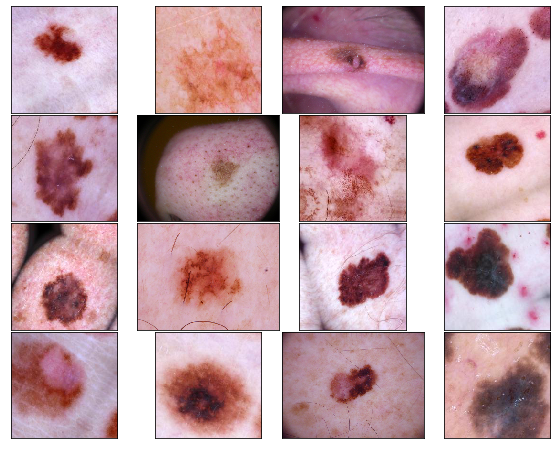

In [123]:
generate_plot_pics("mel")

ISIC_0024922.jpg
ISIC_0029616.jpg
ISIC_0025958.jpg
ISIC_0031374.jpg
ISIC_0028809.jpg
ISIC_0029756.jpg
ISIC_0025065.jpg
ISIC_0029450.jpg
ISIC_0034228.jpg
ISIC_0032084.jpg
ISIC_0029552.jpg
ISIC_0032160.jpg
ISIC_0030077.jpg
ISIC_0024861.jpg
ISIC_0032021.jpg
ISIC_0027201.jpg


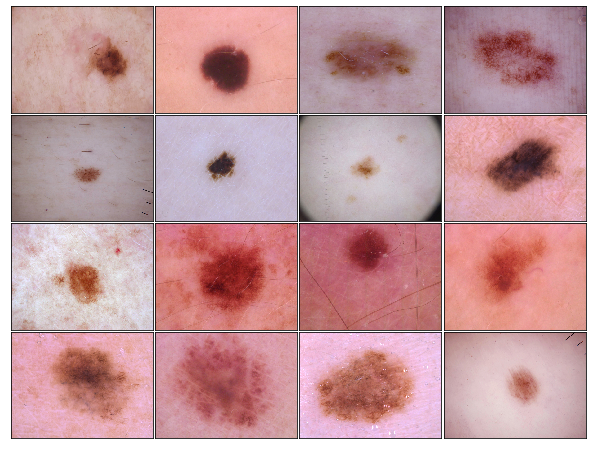

In [124]:
generate_plot_pics("nv")

AUG_238_3498895.jpeg
AUG_66_398498.jpeg
AUG_199_7457792.jpeg
AUG_161_8459342.jpeg
AUG_89_1025245.jpeg
AUG_48_8043876.jpeg
AUG_230_3409528.jpeg
AUG_71_8599962.jpeg
AUG_89_4391471.jpeg
AUG_122_9976530.jpeg
AUG_115_4776560.jpeg
AUG_53_7586713.jpeg
AUG_101_3501149.jpeg
AUG_45_2630482.jpeg
AUG_75_5180826.jpeg
AUG_192_5889289.jpeg


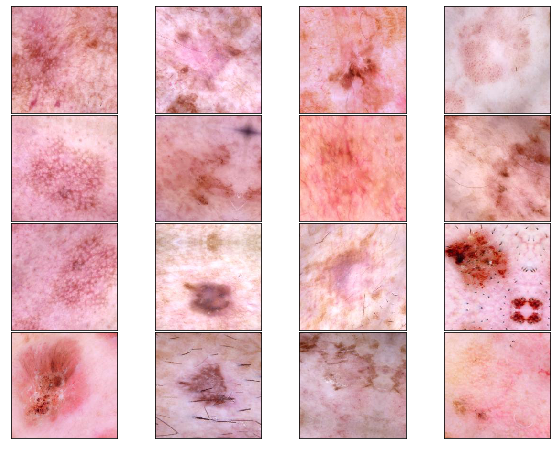

In [125]:
generate_plot_pics("akiec")

### Rescale and Reshape all images (original + augmented)

In [126]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [128]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
)

Found 38890 images belonging to 7 classes.
Found 1103 images belonging to 7 classes.


### Build a baseline model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3), 
    activation="relu", input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer= optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)